This script implements the static beam equation to a cantilevered beam

h - Beam Height - [m]<br>
b - Beam Width - [m]<br>
L - Beam Length - [m]<br>
x - Local Position - [m]<br>
I - Second Moment of Area - [mm<sup>4</sup>]<br>
E - Young's Modulus - [Pa]<br>
q - Distributed Load - [N/m]<br>
V<sub>p</sub> - Magnitude of Point Loads - [N]<br>
L<sub>p</sub> - Position of Point Loads - [m]<br>
V - Shear Force - [N]<br>
M - Bending Moment - [N*m]<br>
Y - Deflection - [m]<br>

In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
# Beam Properties
h = 0.01
b = 0.01
L = 1
E = 180e9

In [32]:
# Moment of Area
x = np.linspace(0, L, 10)
I = ((b * h ** 3) / 12) * (np.linspace(1, 1, x.size))

In [33]:
# Loading
q = -np.linspace(0, 0, x.size)
V_p = np.array([5, 2.5])
L_p = np.array([0.33, 0.66])

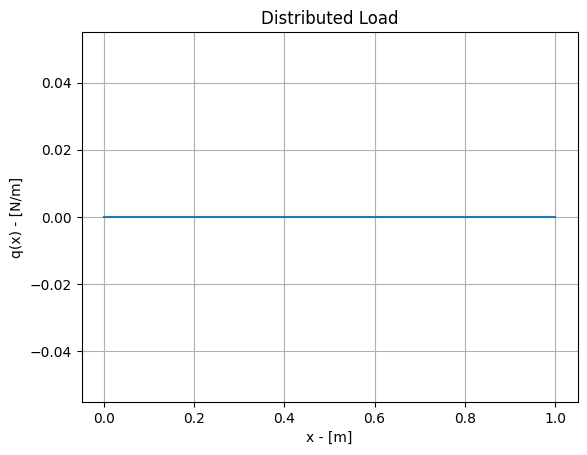

In [34]:
# Plot - Distributed Load
plt.plot(x, q)
plt.title('Distributed Load')
plt.xlabel('x - [m]')
plt.ylabel('q(x) - [N/m]')
plt.grid(True)

In [35]:
def integrate_distributed_load(x, q, V, tol=1e-10):
    """ Shear Force - Distributed Load - Cantilever - Finite Difference Scheme"""
    ea_V = 1
    if sum(q == 0) != x.size:
        while ea_V > tol:
            V_1 = V.sum()
            V[0:-1] = V[1:] - q[0:-1] * (x[1] - x[0])
            ea_V = (V.sum() - V_1) / (V.sum())
            ea_V = np.abs(ea_V)     
    return V

In [36]:
def add_point_loads(x, L_p, V_p, V):
    """Shear Force - Point Loads"""
    for i in range(0, V_p.size):
        V[x > L_p[i]] = V[x > L_p[i]] - V_p[i]
    V = V - V[-1]  
    return V

In [37]:
# Shear force
V = np.zeros(x.size)
V = integrate_distributed_load(x, q, V)
V = add_point_loads(x, L_p, V_p, V)

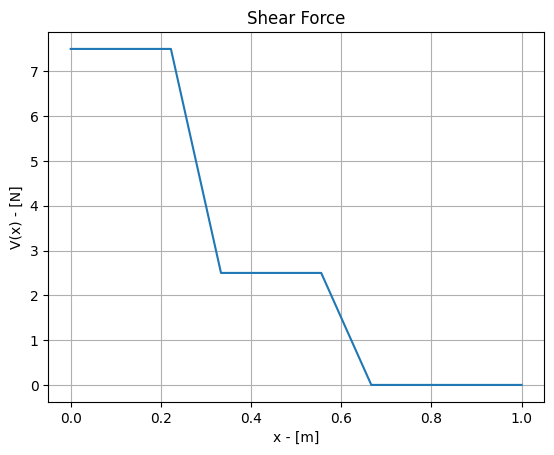

In [38]:
# Plot - Shear Force
plt.plot(x, V)
plt.title('Shear Force')
plt.xlabel('x - [m]')
plt.ylabel('V(x) - [N]')
plt.grid(True)

In [39]:
def integrate_shear_force(x, V, tol=1e-10):
    """Bending Moment - Cantilever - Finite Difference Scheme"""
    M = np.zeros(x.size)
    ea_M = 1
    while ea_M > tol:
        M_1 = M.sum()
        M[0:-1] = M[1:] + V[0:-1] * (x[1] - x[0])
        ea_M = (M.sum() - M_1) / (M.sum())
        ea_M = np.abs(ea_M)
    return M

In [40]:
# Bending Moment
M = integrate_shear_force(x, V)

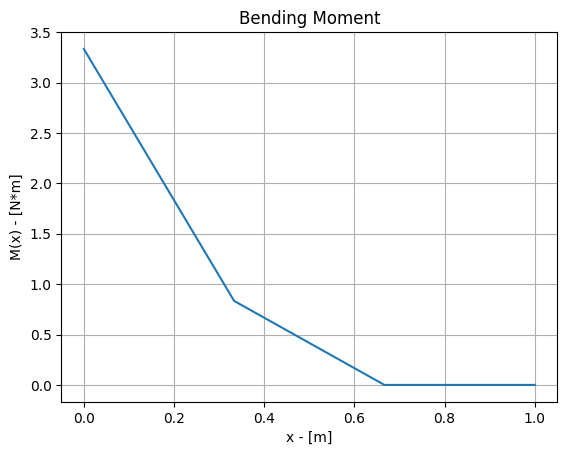

In [41]:
# Plot - Bending Moment
plt.plot(x, M)
plt.title('Bending Moment')
plt.xlabel('x - [m]')
plt.ylabel('M(x) - [N*m]')
plt.grid(True)

In [42]:
def deflection_solver(x, M, E, I, tol=1e-10):
    """Deflection - Cantilever - Finite Difference Scheme"""
    Y = np.zeros(x.size)
    ea_Y = 1
    while ea_Y > tol:
        Y_1 = Y.sum()
        Y[2:] = 2 * Y[1:-1] - Y[0:-2] - (M[2:] / (E * I[2:])) * (x[1] - x[0]) ** 2
        ea_Y = (Y.sum() - Y_1) / (Y.sum())
        ea_Y = np.abs(ea_Y)
    return Y

In [43]:
# Deflection
Y = deflection_solver(x, M, E, I)

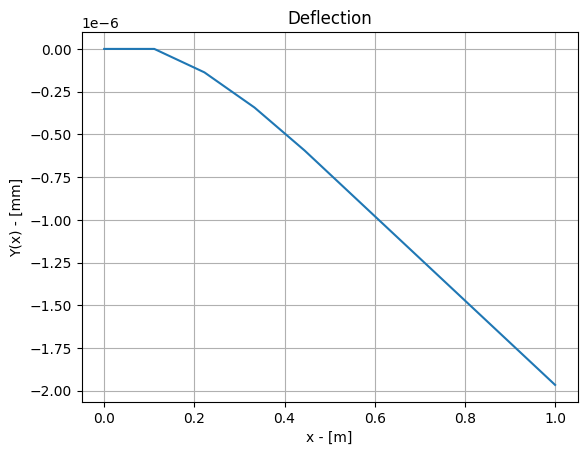

In [44]:
# Plot - Deflection
plt.plot(x, Y/1000)
plt.title('Deflection')
plt.xlabel('x - [m]')
plt.ylabel('Y(x) - [mm]')
plt.grid(True)